# Quantum Teleportation 

### Victor Onofre

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector
from qiskit.quantum_info import Statevector

The statevector_simulator executes a single shot of a Qiskit Quantum Circuit and returns the final quantum statevector of the simulation

In [2]:
backend = BasicAer.get_backend('statevector_simulator')

In [3]:
import numpy as np 
import matplotlib

In [4]:
qubits_Alice = QuantumRegister(2) # The quantum register of the qubits, in this case 2 qubits
qubits_Bob = QuantumRegister(1)
register1_Alice = ClassicalRegister(1) # Where the measurements of the qubits will be saved
register2_Alice = ClassicalRegister(1)

qc = QuantumCircuit(qubits_Alice,qubits_Bob, register1_Alice , register2_Alice)

The goal is to teleport a quantum state; in this case, I choose: 

$$|\Psi> = \sqrt{0.2} |0> + \sqrt{0.8}|1>$$ 
$|\Psi>$ is Alice's qubit and will be teleported to Bob's qubit. 

**The state $|\Psi>$ can be changed here**

In [5]:
state_to_teleport = [np.sqrt(0.2),np.sqrt(0.8)]
state_to_teleport

[0.4472135954999579, 0.8944271909999159]

### Initializing the state to be teleported

In [6]:
qc.initialize(state_to_teleport,0) # Apply initialisation operation to the 0th qubit
qc.barrier()

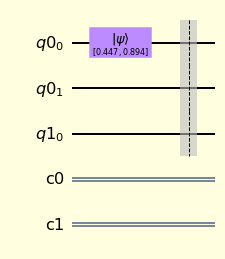

In [7]:
style = {'backgroundcolor': 'lightyellow'}
qc.draw(output='mpl', style=style) 

In [8]:
state = Statevector.from_instruction(qc)

### Showing the initial qubits in the Bloch sphere.The qubit $0$ (Alice) will be teleported to qubit $2$ (Bob)

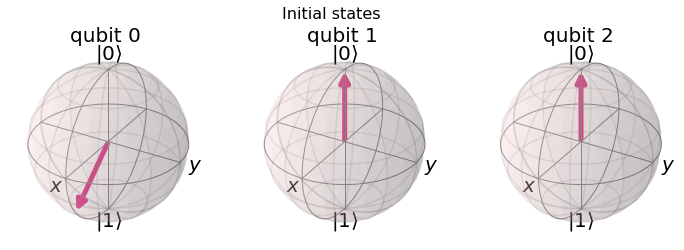

In [9]:
plot_bloch_multivector(state, title='Initial states')

### Creating entanglement between two qubits. Alice owns the qubit $1$, and Bob owns the qubit $2$.

In [10]:
qc.h(1)
qc.cx(1,2)
qc.barrier()

This creates an entangled pair shared between Alice and Bob, $|\phi>_{ab} $.

$$|\phi>_{ab}  =  \frac{1}{\sqrt{2}} \Big(|0>_{a} |0>_{b} + |1>_{a} |1>_{b} \Big) $$

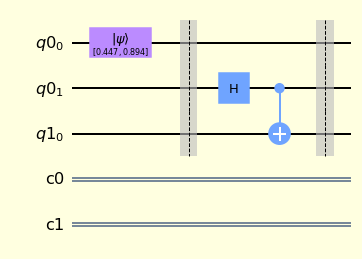

In [11]:
qc.draw(output='mpl', style=style) 

In this stage, Alice’s first qubit ($|\Psi >_{a}$) and the entangled pair she shares with Bob ($|\phi>_{ab} $) are characterized by the 3-qubit state

$$|\Psi >_{a} |\phi>_{ab}  = \Big( \sqrt{0.2} |0>_{a} + \sqrt{0.8}|1>_{a} \Big) \frac{1}{\sqrt{2}} \Big(|0>_{a} |0>_{b} + |1>_{a} |1>_{b} \Big) $$

### Applying a Bell measurement on Alice's qubits $0$ and $1$.

In [12]:
qc.cx(qubits_Alice[0],qubits_Alice[1])

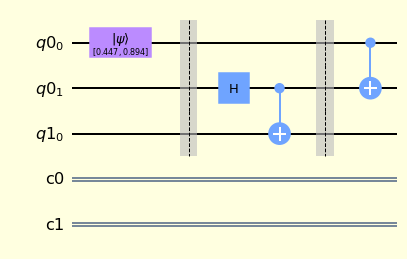

In [13]:
qc.draw(output='mpl', style=style)

To teleport the state of Alice to Bob’s member of the entangled pair, Alice first applies a cNOT gate, using her first qubit in the state $|\Psi >_{a}$ as the control and her member 
of the shared entangled pair as the target.

$$ \sqrt{0.2} |0>_{a} \frac{1}{\sqrt{2}}  \Big( |0>_{a} |0>_{b} + |1>_{a} |1>_{b} \Big) + \sqrt{0.8}|1>_{a} \frac{1}{\sqrt{2}} \Big(|1>_{a} |0>_{b} + |0>_{a} |1>_{b} \Big) $$

In [14]:
qc.h(qubits_Alice[0])
qc.barrier()

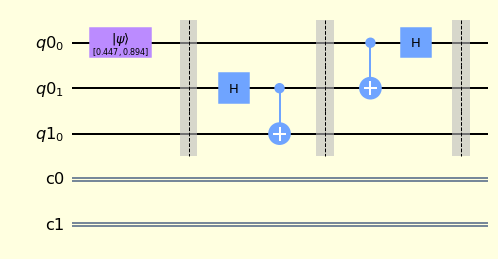

In [15]:
qc.draw(output='mpl', style=style) 

Alice applies the Hadamard gate to her first qubit, giving all three qubits the state:

$$ \sqrt{0.2}\frac{1}{\sqrt{2}} \Big(|0>_{a} + |1>_{a}  \Big) \frac{1}{\sqrt{2}}  \Big( |0>_{a} |0>_{b} + |1>_{a} |1>_{b} \Big) + \sqrt{0.8}\frac{1}{\sqrt{2}} \Big(|0>_{a} - |1>_{a}  \Big)  \frac{1}{\sqrt{2}} \Big(|1>_{a} |0>_{b} + |0>_{a} |1>_{b} \Big) $$

$$ =  \frac{1}{2}  |0>_{a} |0>_{a} \Big( \sqrt{0.2} |0>_{a} + \sqrt{0.8}|1>_{a} \Big) + \frac{1}{2}  |1>_{a} |0>_{a} \Big( \sqrt{0.2} |0>_{a} - \sqrt{0.8}|1>_{a} \Big) + \frac{1}{2}  |0>_{a} |1>_{a} \Big( \sqrt{0.2} |1>_{a} + \sqrt{0.8}|0>_{a} \Big)  + \frac{1}{2}  |1>_{a} |1>_{a} \Big( \sqrt{0.2} |1>_{a} - \sqrt{0.8}|0>_{a} \Big) $$

In [16]:
qc.measure(qubits_Alice[0],register1_Alice)
qc.measure(qubits_Alice[1],register2_Alice)
qc.barrier()

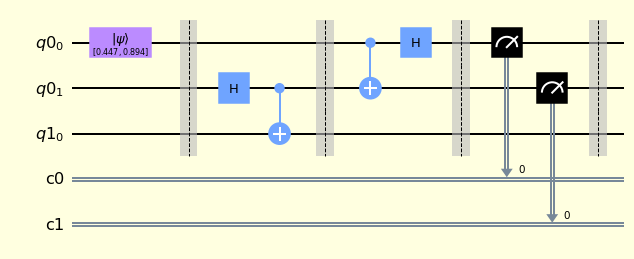

In [17]:
qc.draw(output='mpl', style=style) 

### Applying classically controlled operations on Bob's qubit $2$ depending on the outcomes of the Bell measurement on Alice's qubits.

- An $X$ gate is applied on Bob's qubit if the measurement coutcome of Alice's second qubit, `clbit2_Alice`, is `1`.
- A $Z$ gate is applied on Bob's qubit if the measurement coutcome of Alice's first qubit, `clbit1_Alice`, is `1`.

In [18]:
qc.x(qubits_Bob[0]).c_if(register2_Alice,1)
qc.z(qubits_Bob[0]).c_if(register1_Alice,1)

Now Alice measures both qubits in her possession.If the result is 00, Bob’s qubit will indeed acquire the state $|\Psi>$ originally possessed by Alice’s first qubit (whose state would
then be reduced to $|0>$). But if the result of Alice’s measurement is 10, 01, or 11 then the state of Bob’s qubit becomes

Measurement 00 $\rightarrow$ $ \sqrt{0.2} |0>_{a} + \sqrt{0.8}|1>_{a}$

Measurement 10 $\rightarrow$ $ \sqrt{0.2} |0>_{a} - \sqrt{0.8}|1>_{a}$

Measurement 01 $\rightarrow$ $ \sqrt{0.2} |1>_{a} + \sqrt{0.8}|0>_{a}$ 

Measurement 11 $\rightarrow$ $ \sqrt{0.2} |1>_{a} - \sqrt{0.8}|0>_{a}$

In each of these cases there is a unitary transformation that restores the state of Bob’s qubit to Alice’s original state $|\Psi>$. In the first
case (Measurement 00) Bob’s qubit will indeed acquire the state $|\Psi>$ originally possessed by Alice’s there is no need to apply a transformation. In the second case (Measurement 10)  we can apply $Z$ (which leaves $|0>$ alone but changes the sign of $|1>$), in the third case (Measurement 01) , $X$ (which interchanges $|0>$ and $|1>$), and in the fourth case (Measurement 11), $ZX$ .

### Draw the complete circuit

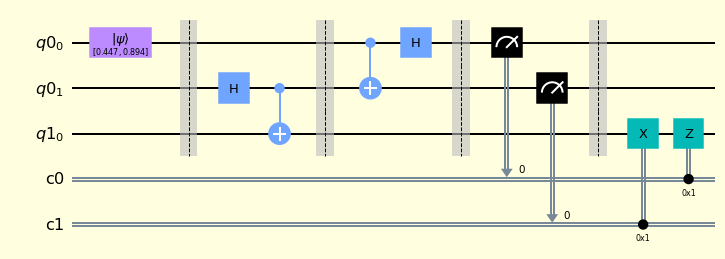

In [19]:
style = {'backgroundcolor': 'lightyellow'}
qc.draw(output='mpl', style=style) 

### Showing the qubits at the end of the circuit in the Bloch sphere.The qubit $0$ (Alice) has been teleported to qubit $2$ (Bob)

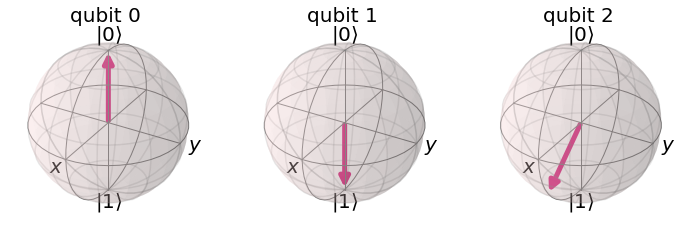

In [20]:
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

## Putting all together in a function

In [21]:
def teleportation_function(state_to_teleport):
    
    q_Alice = QuantumRegister(2)
    q_Bob = QuantumRegister(1)
    r1_Alice = ClassicalRegister(1)
    r2_Alice = ClassicalRegister(1)
    qcirc = QuantumCircuit(q_Alice,q_Bob, r1_Alice , r2_Alice)
    
    qcirc.initialize(state_to_teleport,0)
    qcirc.barrier()
    
    Initial_state = Statevector.from_instruction(qcirc)
    
    qcirc.h(1)
    qcirc.cx(1,2)
    qcirc.barrier()
    
    qcirc.cx(q_Alice[0],q_Alice[1])
    qcirc.h(q_Alice[0])
    qcirc.barrier()
    qcirc.measure(q_Alice[0],r1_Alice)
    qcirc.measure(q_Alice[1],r2_Alice)
    qcirc.barrier()
    
    qcirc.x(q_Bob[0]).c_if(r2_Alice,1)
    qcirc.z(q_Bob[0]).c_if(r1_Alice,1)
    
    
    Final_state = execute(qc, backend).result().get_statevector()
    
    return Initial_state, qcirc, Final_state

In [22]:
state_to_teleport

[0.4472135954999579, 0.8944271909999159]

In [23]:
tele = teleportation_function(state_to_teleport)

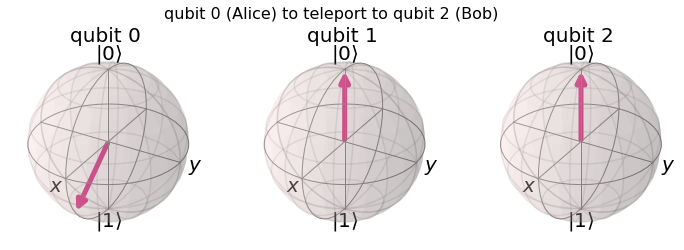

In [24]:
plot_bloch_multivector(tele[0], title='qubit 0 (Alice) to teleport to qubit 2 (Bob)')

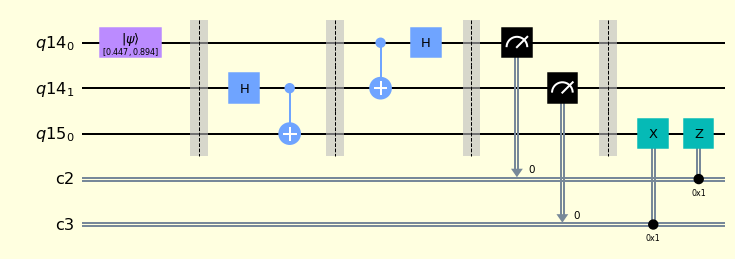

In [25]:
style = {'backgroundcolor': 'lightyellow'}
tele[1].draw(output='mpl', style=style) 

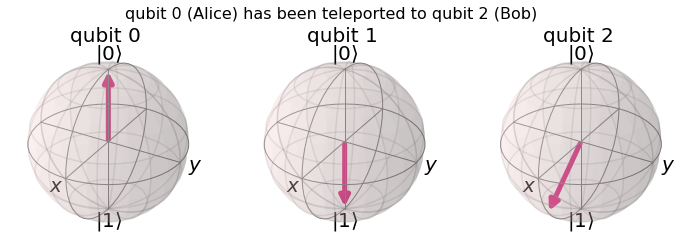

In [26]:
plot_bloch_multivector(tele[2], title='qubit 0 (Alice) has been teleported to qubit 2 (Bob)')

### References:

Mermin N.D., Quantum Computer Science: An Introduction, Cambridge University Press, 2007    